In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Polygon
from math import pi 
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'  # 윈도우: 맑은 고딕
# plt.rcParams['font.family'] = 'Nanum Gothic'  # Mac/Linux: 나눔 고딕

# 폰트 크기, 스타일 등 기본값 설정 (선택 사항)
plt.rcParams['axes.unicode_minus'] = False  # 음수(-) 부호가 깨지지 않도록 설정


In [77]:
def count_rows(file_path):
    data = pd.read_csv(file_path)
    return len(data)

# 일산과 분당의 데이터 집계
for region in ['일산', '분당']:
    files = ilsan_files if region == '일산' else bundang_files
    for data_type, file_path in files.items():
        row_count = count_rows(file_path)
        data_dict[region][data_type] = row_count

In [88]:
ilsan_files = {
    '시장': 'C:/Users/saeya/Downloads/dataset_life_infra_일산_시장및마트.csv',
    '대규모점포': "C:/Users/saeya/Downloads/dataset_life_infra_일산_대규모점포_인허가일자포함.csv",
    '음식점': 'C:/Users/saeya/Downloads/dataset_life_infra_일산_일반음식점_인허가일자포함.csv',
    '병원':"C:/Users/saeya/Downloads/dataset_life_infra_일산_병원.csv",
    '학교':"C:/Users/saeya/Downloads/dataset_life_infra_일산_학교.csv",
    '공원':"C:/Users/saeya/Downloads/dataset_life_infra_일산_공원.csv",
    '의원':"C:/Users/saeya/Downloads/dataset_life_infra_일산_의원.csv"
}

bundang_files = {
    '시장': "C:/Users/saeya/Downloads/dataset_life_infra_분당_시장및마트.csv",
    '대규모점포': "C:/Users/saeya/Downloads/dataset_life_infra_분당_대규모점포_인허가일자포함.csv",
    '음식점': "C:/Users/saeya/Downloads/dataset_life_infra_분당_일반음식점_인허가일자포함.csv",
    '병원':"C:/Users/saeya/Downloads/dataset_life_infra_분당_병원.csv",
    '학교':"C:/Users/saeya/Downloads/dataset_life_infra_분당_학교.csv",
    '공원':"C:/Users/saeya/Downloads/dataset_life_infra_분당_공원.csv",
    '의원':"C:/Users/saeya/Downloads/dataset_life_infra_분당_의원.csv"
}

ilsan_market_file = 'C:/Users/saeya/Downloads/dataset_life_infra_일산_시장및마트.csv'
ilsan_mart_file = "C:/Users/saeya/Downloads/dataset_life_infra_일산_대규모점포_인허가일자포함.csv"
ilsan_restaurant_file = 'C:/Users/saeya/Downloads/dataset_life_infra_일산_일반음식점_인허가일자포함.csv'
ilsan_hospital_file = "C:/Users/saeya/Downloads/dataset_life_infra_일산_병원.csv"
ilsan_school_file = "C:/Users/saeya/Downloads/dataset_life_infra_일산_학교.csv"
ilsan_park_file="C:/Users/saeya/Downloads/dataset_life_infra_일산_공원.csv"
ilsan_hospital2_file="C:/Users/saeya/Downloads/dataset_life_infra_일산_의원.csv"


bundang_market_file = "C:/Users/saeya/Downloads/dataset_life_infra_분당_시장및마트.csv"
bundang_mart_file = "C:/Users/saeya/Downloads/dataset_life_infra_분당_대규모점포_인허가일자포함.csv"
bundang_restaurant_file ="C:/Users/saeya/Downloads/dataset_life_infra_분당_일반음식점_인허가일자포함.csv"
bundang_hospital_file = "C:/Users/saeya/Downloads/dataset_life_infra_분당_병원.csv"
bundang_school_file = "C:/Users/saeya/Downloads/dataset_life_infra_분당_학교.csv"
bundang_park_file="C:/Users/saeya/Downloads/dataset_life_infra_분당_공원.csv"
bundang_hospital2_file="C:/Users/saeya/Downloads/dataset_life_infra_분당_의원.csv"


ilsan_market_data = pd.read_csv(ilsan_market_file)
ilsan_mart_data = pd.read_csv(ilsan_mart_file)
ilsan_restaurant_data = pd.read_csv(ilsan_restaurant_file)
ilsan_hospital_data = pd.read_csv(ilsan_hospital_file)
ilsan_school_data = pd.read_csv(ilsan_school_file)
ilsan_park_data = pd.read_csv(ilsan_park_file)
ilsan_hospital2_data = pd.read_csv(ilsan_hospital2_file)

bundang_market_data = pd.read_csv(bundang_market_file)
bundang_mart_data = pd.read_csv(bundang_mart_file)
bundang_restaurant_data = pd.read_csv(bundang_restaurant_file)
bundang_hospital_data = pd.read_csv(bundang_hospital_file)
bundang_school_data = pd.read_csv(bundang_school_file)
bundang_park_data = pd.read_csv(bundang_park_file)
bundang_hospital2_data= pd.read_csv(bundang_hospital2_file)


# 데이터 저장
data_dict = {
    '일산': {'시장': 0, '대규모점포': 0, '음식점': 0, '병원':0, '학교':0, '공원':0, '의원':0},
    '분당': {'시장': 0, '대규모점포': 0, '음식점': 0,'병원': 0, '학교':0, '공원':0, '의원':0}
}

#print(data_dict)

In [90]:

ilsan_mart_data['폐업일자'] = pd.to_datetime(ilsan_mart_data['폐업일자'].astype(str).str.replace('-', ''), errors='coerce')

In [92]:
# 폐업일자 개수 세기

def count_without_closing_date(file_path):
    df=pd.read_csv(file_path)

    if '폐업일자' in df.columns:
        df_filtered = df[df['폐업일자'].isna()]
    else:
        df_filtered = df

    return df_filtered.shape[0]

ilsan_counts = {
    '시장': count_without_closing_date(ilsan_files['시장']),
    '대규모점포': count_without_closing_date(ilsan_files['대규모점포']),
    '음식점': count_without_closing_date(ilsan_files['음식점']),
    '병원': count_without_closing_date(ilsan_files['병원']),
    '학교':count_without_closing_date(ilsan_files['학교']),
    '공원':count_without_closing_date(ilsan_files['공원']),
    '의원':count_without_closing_date(ilsan_files['의원'])
}

bundang_counts = {
    '시장': count_without_closing_date(bundang_files['시장']),
    '대규모점포': count_without_closing_date(bundang_files['대규모점포']),
    '음식점': count_without_closing_date(bundang_files['음식점']),
    '병원': count_without_closing_date(bundang_files['병원']),
    '학교':count_without_closing_date(bundang_files['학교']),
    '공원':count_without_closing_date(bundang_files['공원']),
    '의원':count_without_closing_date(bundang_files['의원'])
}

print("일산의 개수 (폐업 제외):", ilsan_counts)
print("분당의 개수 (폐업 제외):", bundang_counts)

일산의 개수 (폐업 제외): {'시장': 56, '대규모점포': 48, '음식점': 5721, '병원': 51, '학교': 96, '공원': 137, '의원': 738}
분당의 개수 (폐업 제외): {'시장': 89, '대규모점포': 60, '음식점': 4639, '병원': 27, '학교': 88, '공원': 136, '의원': 1021}


[0.6292134831460674, 0.8, 1.0, 1.0, 1.0, 1.0, 0.722820763956905]


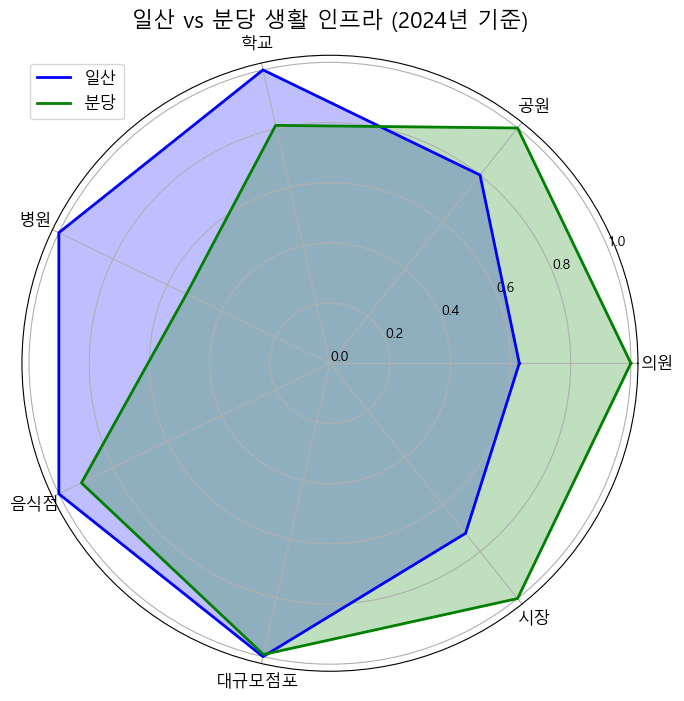

In [154]:
ilsan = [
    ilsan_counts['시장'],  
    ilsan_counts['대규모점포'],
    ilsan_counts['음식점'], 
    ilsan_counts['병원'],
    ilsan_counts['학교'],
    ilsan_counts['공원'],
    ilsan_counts['의원']
]

bundang = [
    bundang_counts['시장'],
    bundang_counts['대규모점포'],
    bundang_counts['음식점'], 
    bundang_counts['병원'],
    bundang_counts['학교'],
    bundang_counts['공원'],
    bundang_counts['의원']
]

categories = ['시장', '대규모점포', '음식점', '병원', '학교', '공원', '의원']
categories = categories[::-1]  # 순서를 반대로 바꿔보기
# 데이터 정규화 
max_values = [max(ilsan[i], bundang[i]) for i in range(len(categories))]
values_ilsan_norm = [value / max_values[i] for i, value in enumerate(ilsan)]
values_bundang_norm = [value / max_values[i] for i, value in enumerate(bundang)]
print(values_ilsan_norm)
# 레이더 차트 각도 설정
angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
angles += angles[:1]  # 첫 번째 각도와 마지막 각도를 맞추기


values_ilsan_norm += values_ilsan_norm[:1]
values_bundang_norm += values_bundang_norm[:1]

# 레이더 차트 그리기
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'polar': True})

ax.plot(angles, values_ilsan_norm, linewidth=2, linestyle='solid', label='일산', color='b')
ax.fill(angles, values_ilsan_norm, alpha=0.25, color='b')
ax.plot(angles, values_bundang_norm, linewidth=2, linestyle='solid', label='분당', color='g')
ax.fill(angles, values_bundang_norm, alpha=0.25, color='g')

# 카테고리 설정
ax.set_xticks(angles[:-1])  # 마지막 각도 제외
ax.set_xticklabels(categories, fontsize=12)

# y축 눈금
ax.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
#ax.set_yticklabels([0, 20, 40, 60, 80, 100], fontsize=10)

# 그래프 제목
ax.set_title('일산 vs 분당 생활 인프라 (2024년 기준)', fontsize=16, pad=20)

# 범례 
ax.legend(loc='upper left', fontsize=12)
plt.savefig('C:/Users/saeya/Downloads/일산 vs 분당 생활 인프라 (2024년 현재 기준).png')

plt.show()


In [240]:
def filter_open_close_date(file_path,y):
    df=pd.read_csv(file_path)
    # 인허가일자 
    if '인허가일자' in df.columns:
        df['인허가일자'] = pd.to_datetime(df['인허가일자'], errors='coerce')  # 날짜 형식
        df = df[df['인허가일자'].dt.year <= y]  # 인허가일자 
        #print(df)
    elif '설립일자' in df.columns:
        #print(df)
        df['설립일자'] = pd.to_datetime(df['설립일자'], errors='coerce')  # 날짜 형식
        df = df[df['설립일자'].dt.year <= y]  # 인허가일자
        #print(df)
    # 폐업일자 
    if '폐업일자' in df.columns:
        df['폐업일자'] = df['폐업일자'].replace("", pd.NaT)  # 빈 문자열을 NaT로
        df['폐업일자'] = pd.to_datetime(df['폐업일자'], errors='coerce')  # 날짜 형식

        # 폐업일자 값이 있는 행만
        df = df[(df['폐업일자'].isna()) | (df['폐업일자'].dt.year > y)]

    return df

find_year_full = 2006

# 폐업일자 2023년과 인허가일자 2024년 제외
ilsan_files_filtered = {key: filter_open_close_date(path,find_year_full) for key, path in ilsan_files.items()}
bundang_files_filtered = {key: filter_open_close_date(path,find_year_full) for key, path in bundang_files.items()}

find_year=6

for key, df in ilsan_files_filtered.items():
    print(f"일산 {key} 데이터 (0{find_year}1231 기준): {len(df)}개   ")
print('\n')
for key, df in bundang_files_filtered.items():
    print(f"분당 {key} 데이터 (0{find_year}1231 기준): {len(df)}개   ")

일산 시장 데이터 (061231 기준): 56개   
일산 대규모점포 데이터 (061231 기준): 24개   
일산 음식점 데이터 (061231 기준): 5245개   
일산 병원 데이터 (061231 기준): 20개   
일산 학교 데이터 (061231 기준): 77개   
일산 공원 데이터 (061231 기준): 137개   
일산 의원 데이터 (061231 기준): 520개   


분당 시장 데이터 (061231 기준): 89개   
분당 대규모점포 데이터 (061231 기준): 46개   
분당 음식점 데이터 (061231 기준): 3467개   
분당 병원 데이터 (061231 기준): 24개   
분당 학교 데이터 (061231 기준): 69개   
분당 공원 데이터 (061231 기준): 136개   
분당 의원 데이터 (061231 기준): 613개   


In [158]:
display(ilsan_files_filtered)
    

{'시장':     Unnamed: 0    시설구분명                                  소재지도로명주소  \
 0            0  로컬푸드직매장                   경기도 고양시 일산동구 장항로 226-68   
 1            1  로컬푸드직매장                      경기도 고양시 일산서구 일산로 640   
 2            2  로컬푸드직매장                        경기도 고양시 일산동구 태극로 8   
 3            3     전통시장                   경기도 고양시 일산서구 일청로 12번길 9   
 4            4  로컬푸드직매장                    경기도 고양시 일산동구 숲속마을1로 34   
 5            5  로컬푸드직매장                       경기도 고양시 일산서구 일청로 30   
 6            6     전통시장              경기도 고양시 일산서구 덕이동 탄중로101번길 13   
 7            7    대규모점포                경기도 고양시 일산서구 호수로 817 (대화동)   
 8            8    대규모점포               경기도 고양시 일산서구 중앙로 1376 (주엽동)   
 9            9    대규모점포               경기도 고양시 일산동구 중앙로 1130 (마두동)   
 10          10    대규모점포             경기도 고양시 일산동구 중앙로 1036-0 (백석동)   
 11          11    대규모점포  경기도 고양시 일산서구 중앙로 1496 (주엽동, 문촌마을11단지아파트)   
 12          12    대규모점포                 경기도 고양시 일산서구 원일로 69 (일산동)   
 13          1

[520, 77, 20, 5245, 24]
[613, 69, 24, 3467, 46]
[0.8482871125611745, 1.0, 0.8333333333333334, 1.0, 0.5217391304347826]


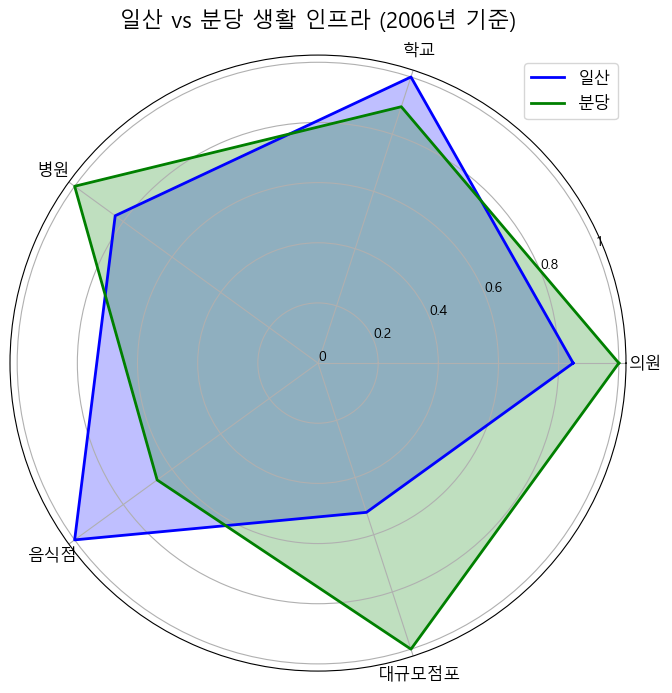

In [194]:

from math import pi

# 카테고리 정의
categories = ['대규모점포', '음식점', '병원', '학교', '의원']
categories = categories[::-1]  # 순서를 반대로
# 개수 계산
ilsan_count = [ilsan_files_filtered[key].shape[0] for key in categories]
bundang_count = [bundang_files_filtered[key].shape[0] for key in categories]
print(ilsan_count)
print(bundang_count)

# 데이터 정규화 (최대값으로 나누기)
max_values = [max(ilsan_count[i], bundang_count[i]) for i in range(len(categories))]
values_ilsan_normalized = [ilsan_count[i] / max_values[i] for i in range(len(categories))]
values_bundang_normalized = [bundang_count[i] / max_values[i] for i in range(len(categories))]

print(values_ilsan_normalized)

# 레이더 차트 각도 설정
angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
angles += angles[:1] 

# 값이 닫히도록 첫 번째 값 복사
values_ilsan_normalized += values_ilsan_normalized[:1]
values_bundang_normalized += values_bundang_normalized[:1]

# 레이더 차트 그리기
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'polar': True})

# 데이터 그리기
ax.plot(angles, values_ilsan_normalized, linewidth=2, linestyle='solid', label='일산', color='b')
ax.fill(angles, values_ilsan_normalized, alpha=0.25, color='b')
ax.plot(angles, values_bundang_normalized, linewidth=2, linestyle='solid', label='분당', color='g')
ax.fill(angles, values_bundang_normalized, alpha=0.25, color='g')

# 카테고리 
ax.set_xticks(angles[:-1]) 
ax.set_xticklabels(categories, fontsize=12)
    
# y축 눈금 설정
ax.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
ax.set_yticklabels([0, 0.2, 0.4, 0.6, 0.8, 1], fontsize=10)

# 그래프 제목
ax.set_title('일산 vs 분당 생활 인프라 (2006년 기준)', fontsize=16, pad=20)

# 범례
ax.legend(loc='upper right', fontsize=12)

# 그래프 파일로 저장
plt.savefig('C:/Users/saeya/Downloads/일산_vs_분당_생활_인프라_2006년_기준.png')

plt.show()
